              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.65      0.68      0.66        71

    accuracy                           0.79       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.79      0.79      0.79       231



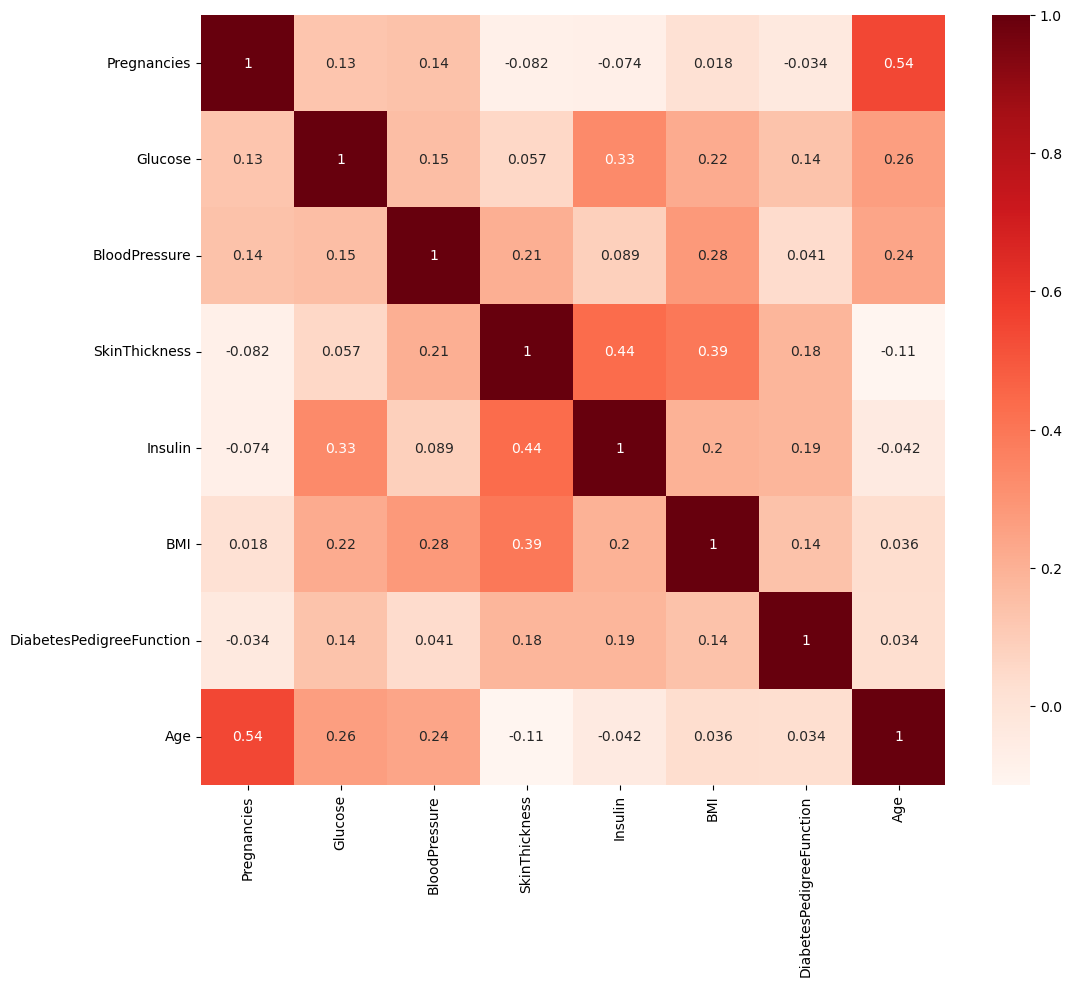

In [6]:
#model2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn

df = pd.read_csv('diabetes.csv')
#seperate the data into input, output var
df.info
df.replace([np.Inf, -np.Inf], np.nan, inplace = True)
df.replace(np.nan, 0, inplace = True)


X = df
Y = X['Outcome']
X.drop('Outcome', axis = 'columns', inplace = True)

#Labeling the output
le = LabelEncoder()
Y = le.fit_transform(Y)

#Data Normalization 
ms = MinMaxScaler()
X = ms.fit_transform(X)

#Split the data into train, test data sample

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

#define the ML model 
model = svm.SVC()
#train the model
model.fit(xtrain, ytrain)

#predict the output of the ML model 
pred = model.predict(xtest)

cr=classification_report(ytest, pred)
print(cr)

plt.figure(figsize = (12,10))
cor = df.corr()
sn.heatmap(cor, annot = True, cmap=plt.cm.Reds)
plt.show()

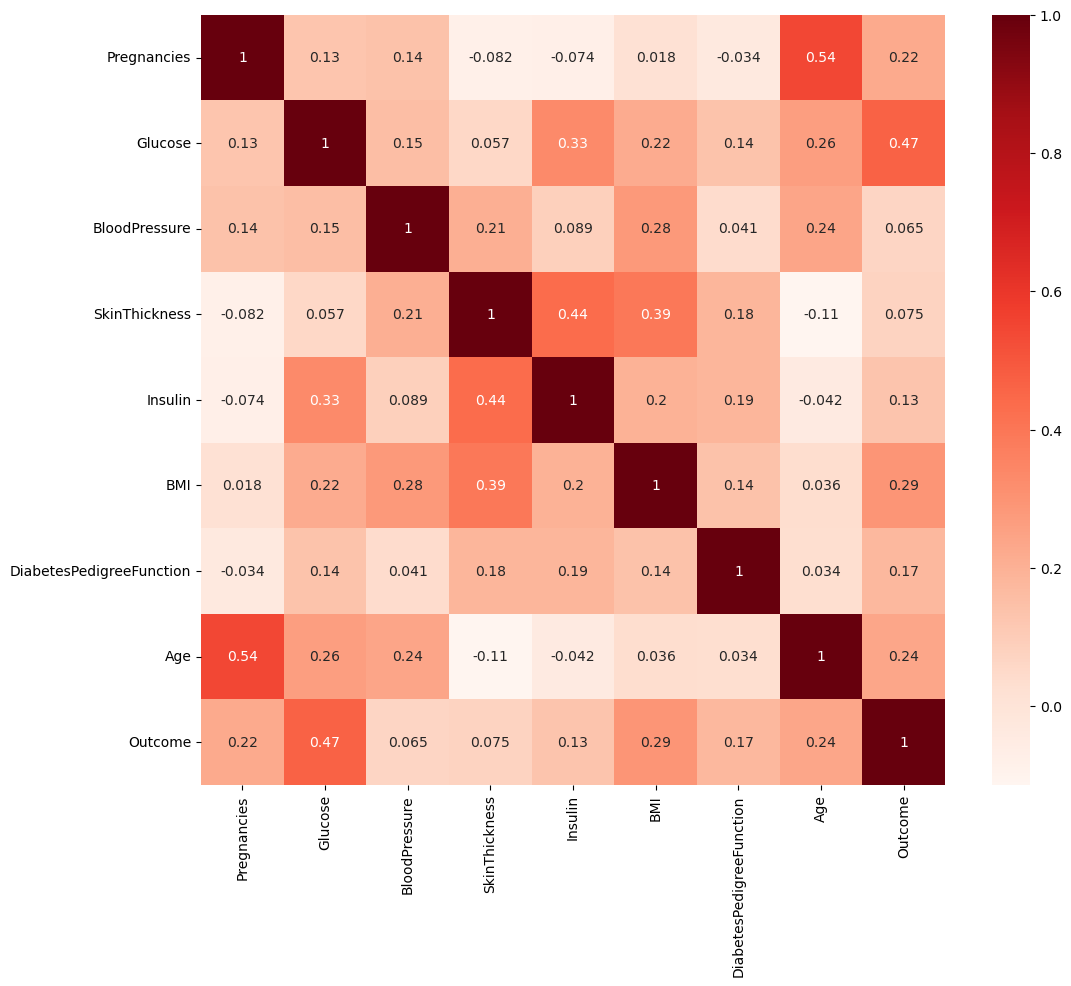

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.66      0.51      0.57        81

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



In [7]:
data = pd.read_csv('diabetes.csv')
plt.figure(figsize = (12,10))
cor = data.corr()
sn.heatmap(cor, annot = True, cmap=plt.cm.Reds)
plt.show()

#Split the data into train, test data sample

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state=9)

#define the ML model 
model = svm.SVC()
#train the model
model.fit(xtrain, ytrain)

#predict the output of the ML model 
pred = model.predict(xtest)

cr=classification_report(ytest, pred)
print(cr)

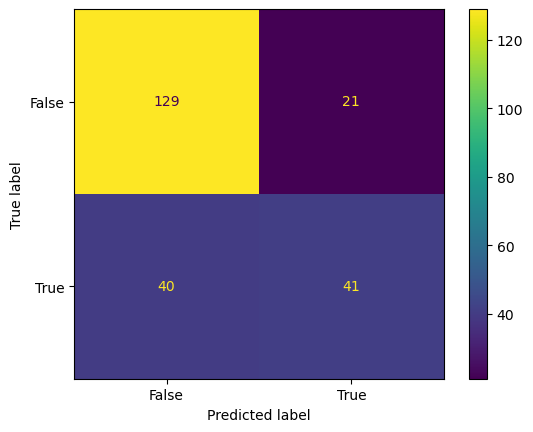

In [8]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

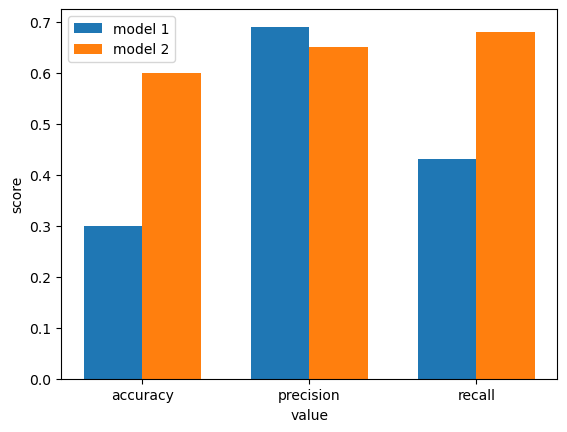

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = ['accuracy', 'precision', 'recall']
model1 = [0.3, 0.69,0.43]
model2 = [0.6, 0.65, 0.68]
x = np.arange(len(labels))
width = 0.35

# 그래프 그리기
plt.bar(x - width/2, model1, width, label='model 1')
plt.bar(x + width/2, model2, width, label='model 2')

# 세부 설정
plt.xticks(x, labels)
plt.xlabel('value')
plt.ylabel('score')
plt.legend()

# 그래프 표시
plt.show()

